In [87]:
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
df= pd.read_csv('/sydney_rain prediction.csv', header = 0 )

In [89]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing

### Missing values treatment

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [92]:
missing_values = df.isnull()
total_missing = missing_values.sum().sum()

if total_missing == 0:
    print("No missing values detected")
else:
    print("Missing values detected")
    print("\nTotal Missing values:\n", missing_values.sum())

Missing values detected

Total Missing values:
 Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


We can treat missing values in 3 ways :
1 Delete the rows
2 substitute the missing value with 0
3 replace the missing value with the mean

### Here we will choose the "Mean Substitution" because the missing values are different for every parameter

In [93]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())

df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())





In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


Since RainfallToday is categorial variable we will replace Yes and No with 0 and 1 . And fill the missing values with 0
Because it has only 6 values so it won't affect much

In [95]:
df['RainToday'] = df['RainToday'].fillna(0)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3337 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


#### We have treated the missing values

In [97]:
del df['Date']

#### As the date is already arranged in the order and so it the data so we can delete the date column

### Categorical Variable treatment

In [98]:
df= pd.get_dummies(df)
df= df.astype(int)

In [99]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Sydney,RainToday_0,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,1,0,0,1,0,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,1,0,0,1,0,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,1,0,0,1,0,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,1,0,0,1,0,1
4,19,25,77,5,0,88,74,1008,1004,8,8,22,25,1,0,0,1,0,1


In [100]:
del df['RainToday_0']
del df['RainToday_No']
del df['RainTomorrow_No']

In [101]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Sydney,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,1,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,1,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,1,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,1,1,1
4,19,25,77,5,0,88,74,1008,1004,8,8,22,25,1,1,1


<Axes: xlabel='Location_Sydney', ylabel='count'>

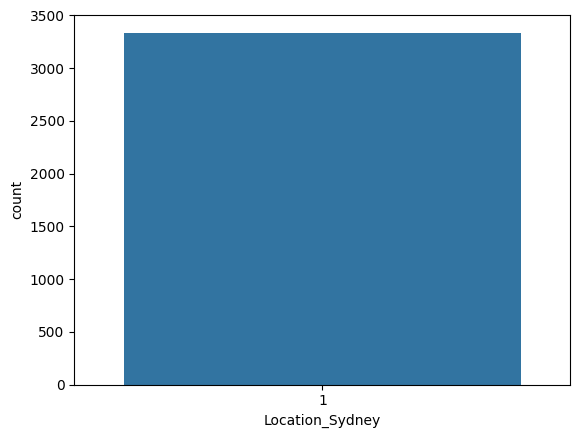

In [102]:
sns.countplot(x='Location_Sydney', data=df)

### <u> Since We have only one Location in the table so we can delete the Location column as well

In [103]:
del df['Location_Sydney']

In [104]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,1,1
4,19,25,77,5,0,88,74,1008,1004,8,8,22,25,1,1


### Outliers treatment

In [105]:
import matplotlib.pyplot as plt

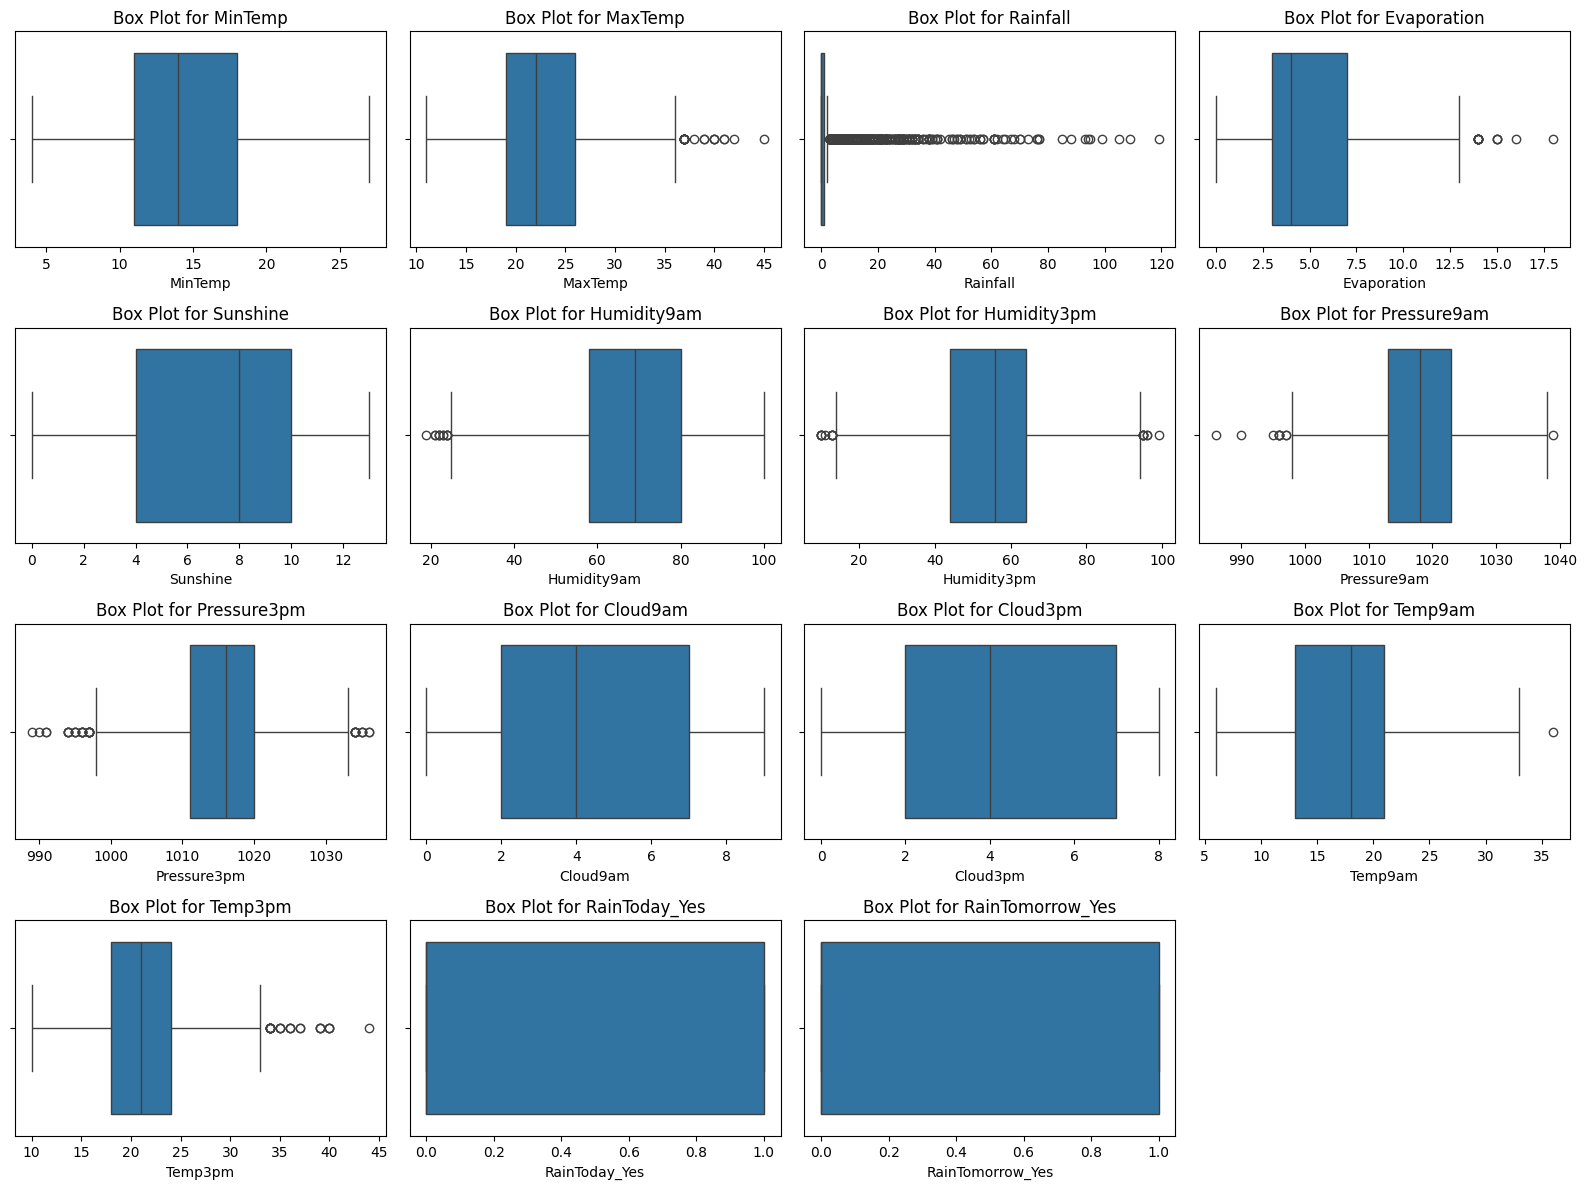

In [106]:
import matplotlib.pyplot as plt

### we will select the columns having numeric values for boxplots

num_col = df.select_dtypes(include='number').columns


plt.figure(figsize=(16, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


#### As we see we have Outliers for maximum temperature , hence we will treat it

In [107]:
ul_mt = np.percentile(df.MaxTemp, [99])[0]

<i> Here 'ul_mt' stands for 'upper limit of Maximum temperature'

In [108]:
df[(df.MaxTemp > 3*ul_mt)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes


In [109]:
df.MaxTemp[(df.MaxTemp > 3*ul_mt)] = 3*ul_mt

<Axes: ylabel='MaxTemp'>

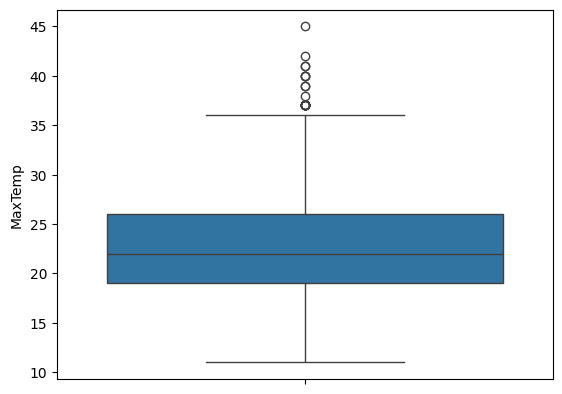

In [110]:
sns.boxplot(df['MaxTemp'])

#### <i> let's treat Evaporation in the same way

In [111]:
ul_ev = np.percentile(df.Evaporation, [99])[0]

In [112]:
df.MaxTemp[(df.Evaporation > 3*ul_ev)] = 3*ul_ev

<Axes: ylabel='MaxTemp'>

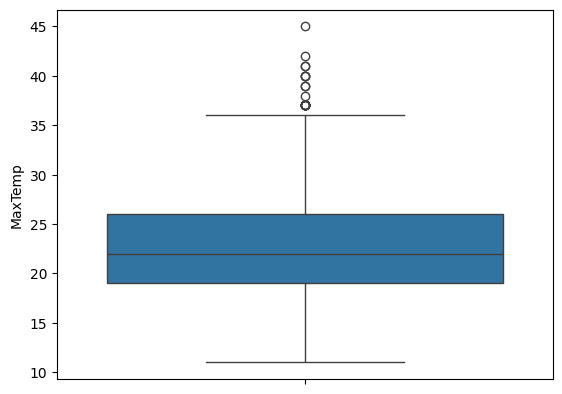

In [113]:
sns.boxplot(df['MaxTemp'])

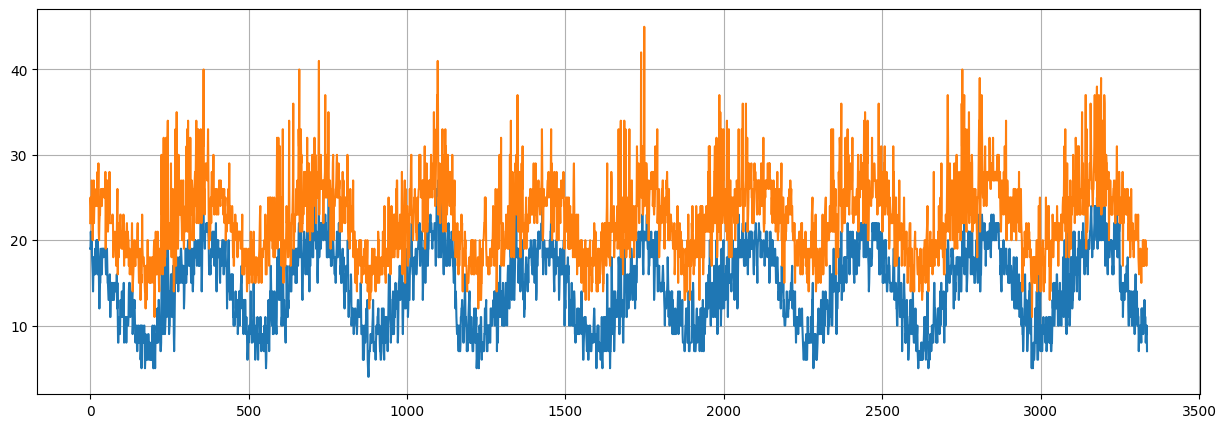

In [114]:
plt.figure(figsize = (15, 5))
fig = plt.plot( df[['MinTemp', 'MaxTemp']])
plt.grid();

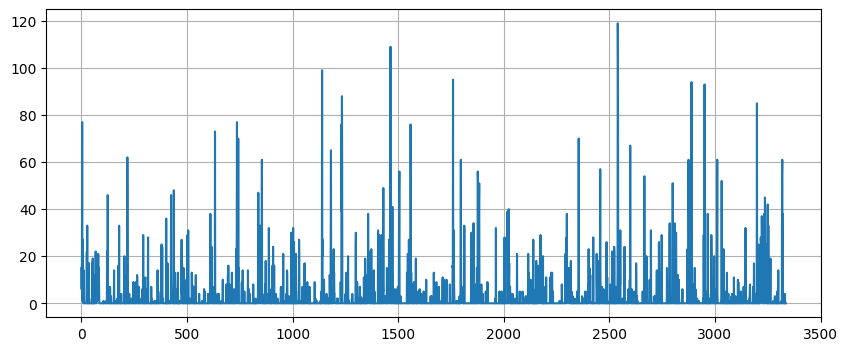

In [115]:
plt.figure(figsize = (10,4))
fig = plt.plot( df[['Rainfall']])
plt.grid();

## Model Creation

### X-Y split

In [116]:
x= df.loc[:,df.columns!= 'RainTomorrow_Yes']

In [117]:
y =df["RainTomorrow_Yes"]

In [118]:
x.shape


(3337, 14)

In [119]:
y.shape

(3337,)

### Test- Train Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train , x_test , y_train , y_test = train_test_split (x, y, test_size=0.2,random_state= 0)

In [122]:
y_train.head()

245     1
2258    0
242     0
2747    1
2982    1
Name: RainTomorrow_Yes, dtype: int64

In [123]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


### Classification  tree

In [124]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [125]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [126]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [127]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

#### <u> Model Performance

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
confusion_matrix(y_train, y_train_pred)

array([[1905,   57],
       [ 413,  294]])

In [130]:
confusion_matrix(y_test, y_test_pred)

array([[492,  18],
       [100,  58]])

In [131]:
accuracy_score(y_test, y_test_pred)

0.8233532934131736

### Plotting decision tree

In [132]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

In [133]:
from IPython.display import Image

In [134]:
import pydotplus

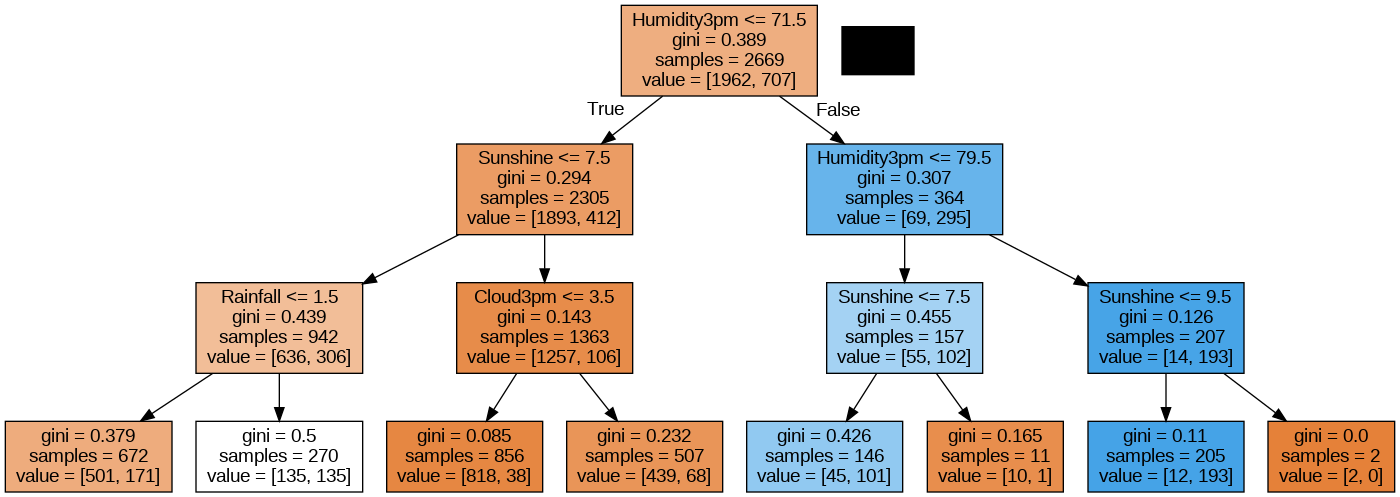

In [135]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### <u> Controlling Tree growth

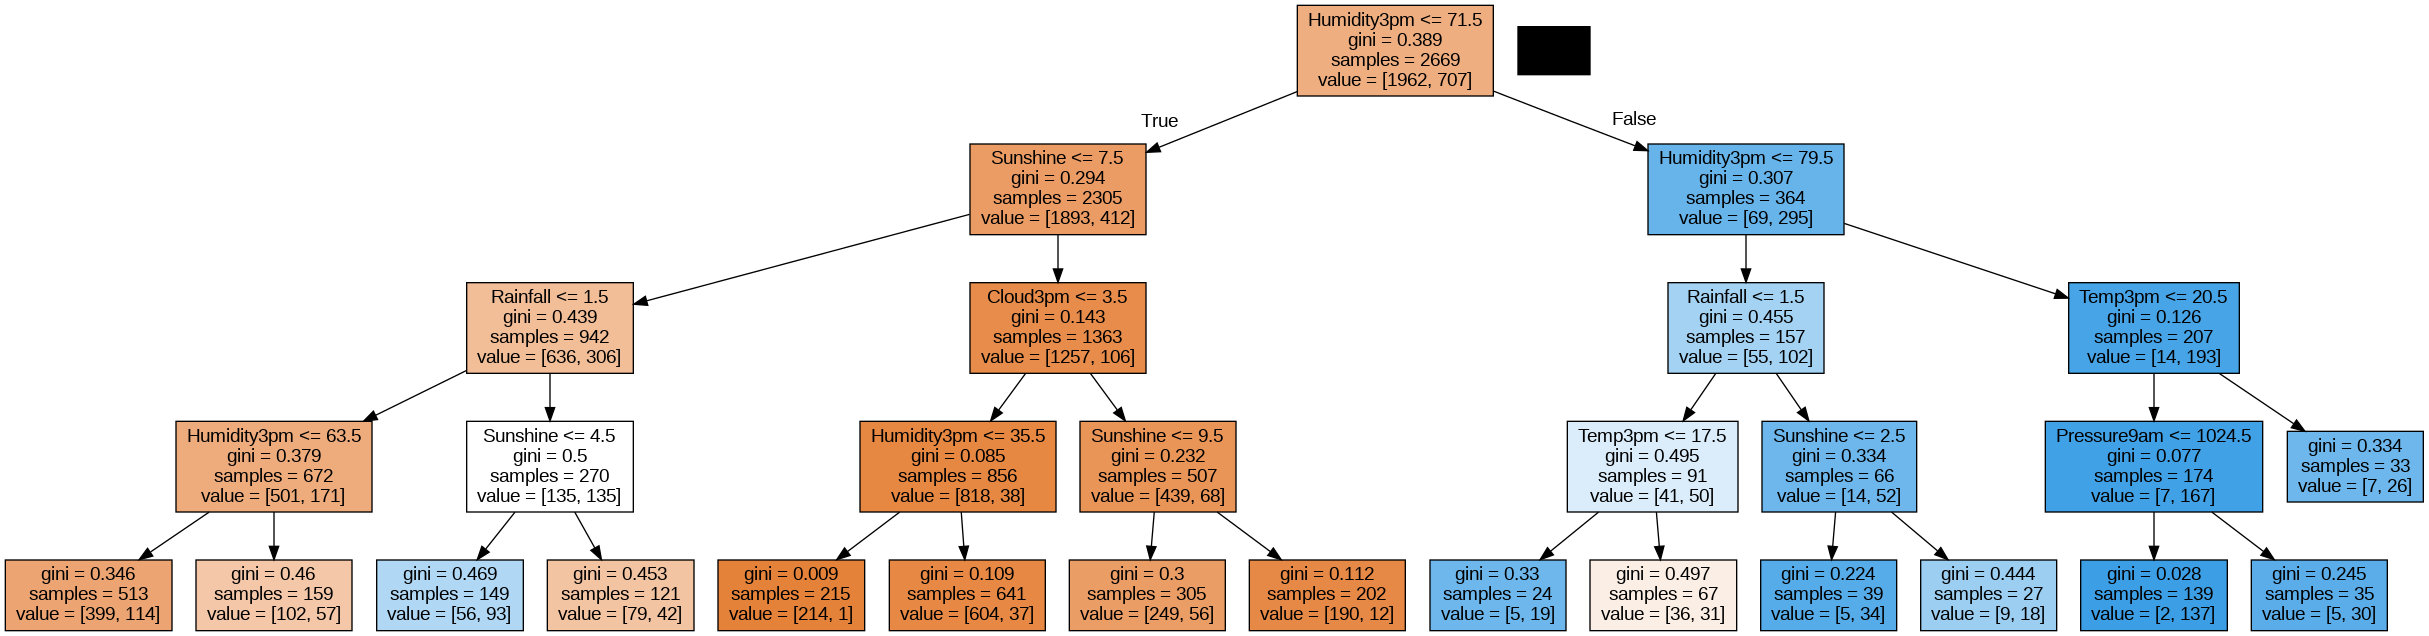

In [136]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [138]:
accuracy_score(y_test, clftree2.predict(x_test))

0.8218562874251497

### Bagging


In [139]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [140]:
from sklearn.ensemble import BaggingClassifier

In [141]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [142]:
bag_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [143]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[471,  39],
       [ 75,  83]])

In [144]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.8293413173652695

### Random Forest


In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [147]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [148]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[479,  31],
       [ 78,  80]])

In [149]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.8368263473053892

### Grid Search


In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [152]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [153]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [154]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [155]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 10}

In [156]:
cvrf_clf = grid_search.best_estimator_

In [157]:
accuracy_score(y_test, cvrf_clf.predict(x_test))

0.8278443113772455

In [158]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[473,  37],
       [ 78,  80]])

## Boosting Techniques

### Gradient Boosting


In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [161]:
accuracy_score(y_test, gbc_clf.predict(x_test))

0.8248502994011976

In [162]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [163]:
accuracy_score(y_train, gbc_clf2.predict(x_train))

0.8441363806669164

In [164]:
accuracy_score(y_test, gbc_clf2.predict(x_test))

0.8338323353293413

### Ada Boost


In [165]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [167]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [168]:
accuracy_score(y_train, ada_clf.predict(x_train))

0.8467590857999251

In [169]:
accuracy_score(y_test, ada_clf.predict(x_test))

0.8368263473053892

In [170]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [171]:
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [172]:
accuracy_score(y_test, ada_clf2.predict(x_test))

0.8353293413173652

### XG boost

In [173]:
import xgboost as xgb

In [174]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [175]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [176]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.8233532934131736

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

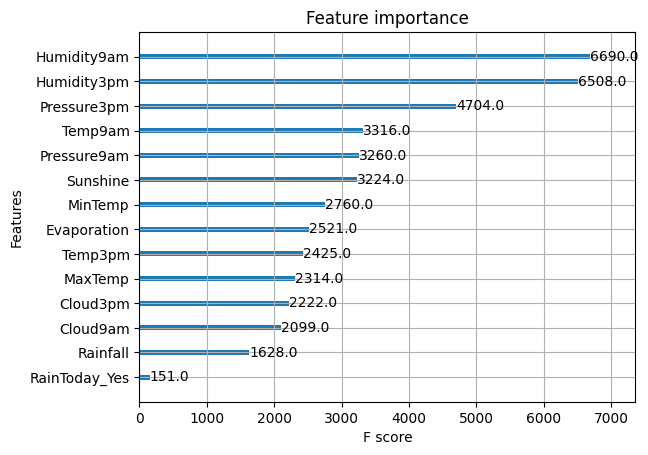

In [177]:
xgb.plot_importance(xgb_clf)

In [178]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [180]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [181]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [182]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [183]:
cvxg_clf = grid_search.best_estimator_

In [184]:
accuracy_score(y_test, cvxg_clf.predict(x_test))

0.8413173652694611

In [185]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

### Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

In [188]:
clf_lr = LogisticRegression()
clf_lr.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
clf_lr.coef_

array([[-0.13763748,  0.09788381,  0.03077408,  0.04209992, -0.21516214,
         0.01109155,  0.05224096, -0.09924881,  0.09510691, -0.11208225,
         0.17559507,  0.06857857, -0.06037567,  0.09758528]])

In [190]:
clf_lr.intercept_

array([0.00120867])

In [191]:
x_cons = sn.add_constant(x)

In [192]:
logit = sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.382173
         Iterations 7


In [193]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           14
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3321
Time:                        20:31:14   Log-Likelihood:                -1275.3
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                3.283e-262
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.4481      8.505      3.580      0.000      13.779      47.117
MinTemp          -0.2129      0.045     -4.737      0.000      -0.301      -0.125
MaxTemp           0.0805      0.041      1.970      0.049       0.000       0.160
Rainfall          0.0106      0.007      1.622      0.105      -0.002       0.023
Evaporation       0.0552      0.025      2.196      0.028       0.006       0.105
Sunshine         -0.2249      0.022     -9.997      0.000      -0.269      -0.181
Humidity9am       0.0133      0.007      1.958      0.050   -9.98e-06       0.027
Humidity3pm       0.0500      0.007      7.434      0.000       0.037       0.063
Pressure9am      -0.1132      0.030     -3.765      0.000      -0.172      -0.054
Pressure3pm       0.0790      0.029      2.731      0.006       0.022       0.136
Cloud9am         -0.0824      0.030     -2.746      0.006      -0.141      -0.024
Cloud3pm          0.1484      0.031      4.747      0.000       0.087       0.210
Temp9am           0.1292      0.048      2.679      0.007       0.035       0.224
Temp3pm          -0.0409      0.047     -0.861      0.389      -0.134       0.052
RainToday_Yes     0.6945      0.136      5.117      0.000       0.428       0.961
=================================================================================
"""

#### <i> <u> Prediction and confusion matrix creation

In [194]:
clf_lr.predict_proba(x)

array([[0.09798186, 0.90201814],
       [0.32246358, 0.67753642],
       [0.14175126, 0.85824874],
       ...,
       [0.67065407, 0.32934593],
       [0.98008392, 0.01991608],
       [0.96574409, 0.03425591]])

In [195]:
y_pred = clf_lr.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [196]:
y_pred_03 = (clf_lr.predict_proba(x)[:,1] >= 0.3)

In [197]:
y_pred_03

array([ True,  True,  True, ...,  True, False, False])

In [198]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[2294,  178],
       [ 384,  481]])

In [199]:
confusion_matrix(y, y_pred_03)

array([[2042,  430],
       [ 243,  622]])

 ##### Linear Discriminant Analysis (LDA)

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [201]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x, y)

LinearDiscriminantAnalysis()

In [202]:
y_pred_lda = clf_lda.predict(x)

In [203]:
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0])

In [204]:
confusion_matrix(y, y_pred_lda)

array([[2266,  206],
       [ 359,  506]])

In [205]:
from sklearn.metrics import precision_score, recall_score

In [206]:
precision_score(y, y_pred)

0.7298937784522003

In [207]:
recall_score(y, y_pred)

0.5560693641618497

In [209]:
from sklearn.metrics import roc_auc_score

In [208]:
clf_LR = LogisticRegression()
clf_LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
y_test_pred = clf_LR.predict(x_test)

In [211]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [212]:
confusion_matrix(y_test, y_test_pred)

array([[471,  39],
       [ 75,  83]])

In [213]:
accuracy_score(y_test, y_test_pred)

0.8293413173652695

### K-Nearest Neighbors

In [214]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s= scaler.transform(x_train)

In [215]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler.transform(x_test)

In [216]:
x_test_s

array([[-0.51863853, -0.59536511, -0.30226949, ..., -0.27673787,
        -0.74870915, -0.56351951],
       [-0.07304298,  0.5319135 , -0.30226949, ..., -0.27673787,
        -0.27374456, -0.56351951],
       [ 0.14975479,  0.98282494, -0.30226949, ...,  0.75600457,
         1.3886315 , -0.56351951],
       ...,
       [-0.96423407, -0.59536511, -0.30226949, ..., -0.07018938,
        -0.51122686, -0.56351951],
       [ 0.14975479,  1.88464782, -0.30226949, ...,  0.34290759,
         1.86359609, -0.56351951],
       [-1.85542516, -1.27173227, -0.30226949, ..., -1.92912576,
        -0.98619145, -0.56351951]])

In [217]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [218]:
confusion_matrix(y_test, clf_knn_1.predict(x_test_s))

array([[414,  96],
       [ 77,  81]])

In [219]:
accuracy_score(y_test, clf_knn_1.predict(x_test_s))

0.7410179640718563

In [220]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(x_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(x_test_s))

0.7949101796407185

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}

In [223]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [224]:
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [225]:
grid_search_cv.best_params_

{'n_neighbors': 30}

In [226]:
optimised_KNN = grid_search_cv.best_estimator_

In [227]:
y_test_pred = optimised_KNN.predict(x_test_s)

In [228]:
confusion_matrix(y_test, y_test_pred)

array([[482,  28],
       [ 85,  73]])

In [229]:
accuracy_score(y_test, y_test_pred)

0.8308383233532934

## <u> Comparison of different fitted Models

**Here are the Accuracy Scores of the Models :**

Bagging             : 0.8293413173652695

Random Forest       : 0.8368263473053892

Grid Search:        : 0.8278443113772455

Gradient boosting   : 0.8338323353293413

Ada boosting        : 0.8353293413173652

Xgboost             : 0.8233532934131736

Logistic Regression : 0.8293413173652695

K-Nearest Neighbors : 0.8308383233532934
(KNN)                 


## <b> Questions

### 1 Your views about the problem statement?

The Problem statement contains Weather data of several dates for the place - Sydney .
We have to use ML models to predict the rainfall for the next day.
We will create the models by splitting the data into train and test set in the ratio of 88:20 and
will select the model that gives the best prediction.
Since we have to predict the possibility of rainfall tomorrow , this is the Classification Problem

### 2 What will be your approach to solving this task?

My approach to solving this task s :

<b> (A) Data Preprocessing

convert RainToday and RainTomorrow column into dummy variable
Replace Null values with

check for outliers and treat the Outliers in the best possible way

<b> (B) Model Selcetion:

We are supposed to try various  various classification models, like :
Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, AdaBoost, XGBoost).

<b> (C) Model Training and Evaluation:

Split the data into test and train datasets. (take the train-test ratio as 80:20
Train the particular model on the training dataset.
evaluate their performance using metrics like accuracy, ROC AUC, recall, and precision.
Select the model with the best performance.

<b> (D)Model Comparison:

Compare the performance of different models to select the best one

<b> (E)Model Optimization:

use hyperparameter by gridsearchcv to improve model accuracy

### 3 What were the available ML model options you had to perform this task ?

The Availabe Models I have used in this case vary from the basic ones
like Logistic Regression to the complex Ensemble technique like  Boosting models
The models I have used are :
<i> The available ML model options include:

Decision Trees
Bagging
Random Forest
Boosting :
_ Gradient Boosting
 _ AdaBoost
_ XGBoost
Logistic Regression
Linear Discriminant Analysi
K-Nearest Neighbors


### 4 Which model’s performance is best and what could be the possible reason for that?

After the Comparison of all the Models we have created
Random Forest has the highest Accuracy-Score - **0.8368263473053892**
so the best fit for this case scenario would be **Random Forest**.

### 5  What steps can you take to improve this selected model’s performance even further?

The following steps can be taken :

Gathering adquate data - get more diverse sample size
Fine-tuning model hyperparameters ensures optimal performance.
use more advanced method like Ensemble Method.
Implement k-fold cross-validation to ensure the model's robustness and reduce overfitting.
Apart from testing multiple variables at a time , also check the impact of individeual independent vairables on the dependent one.